In [1]:
import numpy as np

num_features = 2
loc = 1
scale = 0.5

x_train = np.vstack([np.random.normal(size=(9000, num_features)), np.random.normal(loc=loc, scale=scale, size=(1000, num_features))])
x_train.shape

(10000, 2)

In [2]:
y_train = np.hstack([np.zeros((9000,)), np.ones((1000,))])
y_train.shape

(10000,)

In [3]:
x_test = np.vstack([np.random.normal(size=(900, num_features)), np.random.normal(loc=loc, scale=scale, size=(100, num_features))])
x_test.shape

(1000, 2)

In [4]:
y_test = np.hstack([np.zeros((900,)), np.ones((100,))])
y_test.shape

(1000,)

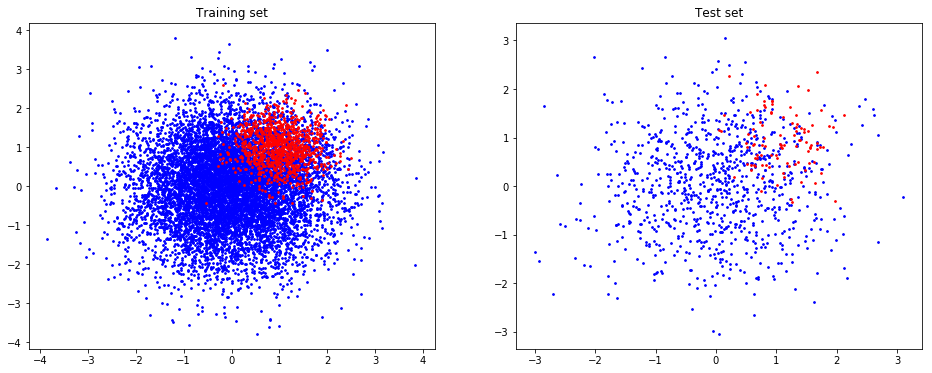

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.title("Training set")
plt.subplot(1, 2, 2)
plt.scatter(x_test[:900, 0], x_test[:900, 1], s=3, c='b')
plt.scatter(x_test[900:, 0], x_test[900:, 1], s=3, c='r')
plt.title("Test set")

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras.backend as K

def auc(y_true, y_pred):
    y_true_1 = tf.equal(y_true, 1)
    y_true_0 = tf.equal(y_true, 0)
    a = tf.boolean_mask(y_pred, y_true_1)
    b = tf.boolean_mask(y_pred, y_true_0)
    return K.mean(a[None, :] > b[:, None])

In [13]:
model = Sequential()
#model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

In [14]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.8632 - acc: 0.4836 - auc: 0.3529 - val_loss: 0.7848 - val_acc: 0.5410 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.7997 - acc: 0.5166 - auc: 0.3555 - val_loss: 0.7293 - val_acc: 0.5690 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.7417 - acc: 0.5493 - auc: 0.3530 - val_loss: 0.6789 - val_acc: 0.5990 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.6887 - acc: 0.5845 - auc: 0.3684 - val_loss: 0.6331 - val_acc: 0.6370 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.6408 - acc: 0.6267 - auc: 0.3712 - val_loss: 0.5915 - val_acc: 0.6860 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.5977 - acc: 0.6763 - auc: 0.3863 - val_loss: 0.5545 - val_acc: 0.7250 - val_auc: nan
Epoch 7/1

10000/10000 [==============================] - 0s - loss: 0.2379 - acc: 0.8928 - auc: 0.8963 - val_loss: 0.2365 - val_acc: 0.8940 - val_auc: nan
Epoch 53/100
10000/10000 [==============================] - 0s - loss: 0.2372 - acc: 0.8928 - auc: 0.8969 - val_loss: 0.2358 - val_acc: 0.8940 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 0.2367 - acc: 0.8925 - auc: 0.8969 - val_loss: 0.2353 - val_acc: 0.8940 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 0.2361 - acc: 0.8919 - auc: 0.8943 - val_loss: 0.2348 - val_acc: 0.8940 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 0.2356 - acc: 0.8925 - auc: 0.8970 - val_loss: 0.2342 - val_acc: 0.8940 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: 0.2352 - acc: 0.8920 - auc: 0.8975 - val_loss: 0.2338 - val_acc: 0.8940 - val_auc: nan
Epoch 58/100
10000/10000 [==============================] - 0s - 

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[885,  91],
       [ 15,   9]])

In [17]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.89663333333333339

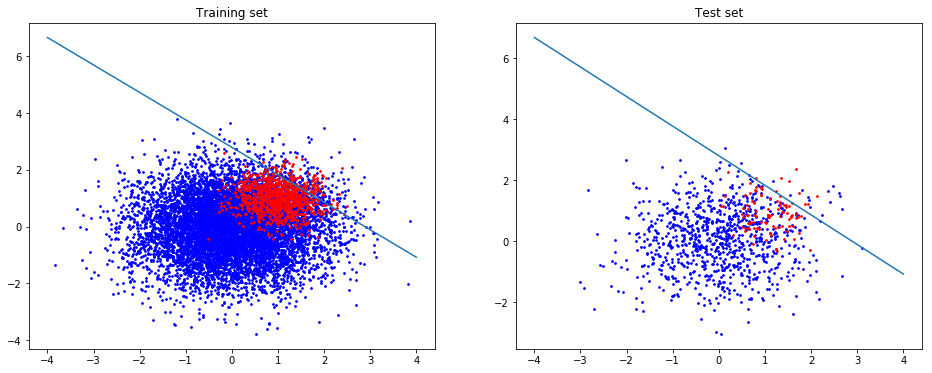

In [18]:
def f(x, w):
    (a, b), c = w
    return -(c + a*x)/b

x1 = [-4, 4]
y1 = f(x1, model.get_weights())

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.title("Training set")
plt.subplot(1, 2, 2)
plt.scatter(x_test[:900, 0], x_test[:900, 1], s=3, c='b')
plt.scatter(x_test[900:, 0], x_test[900:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.title("Test set")

In [19]:
model = Sequential()
#model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auc])

In [20]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight

array([ 0.55555556,  5.        ])

In [21]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test), class_weight=class_weight)

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.9342 - acc: 0.4792 - auc: 0.3223 - val_loss: 0.8459 - val_acc: 0.5290 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.8688 - acc: 0.5037 - auc: 0.3190 - val_loss: 0.7881 - val_acc: 0.5540 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.8076 - acc: 0.5299 - auc: 0.3206 - val_loss: 0.7341 - val_acc: 0.5740 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.7508 - acc: 0.5600 - auc: 0.3277 - val_loss: 0.6844 - val_acc: 0.6100 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.6985 - acc: 0.5935 - auc: 0.3382 - val_loss: 0.6385 - val_acc: 0.6480 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.6507 - acc: 0.6309 - auc: 0.3425 - val_loss: 0.5970 - val_acc: 0.6830 - val_auc: nan
Epoch 7/1

10000/10000 [==============================] - 0s - loss: 0.2384 - acc: 0.8928 - auc: 0.8970 - val_loss: 0.2367 - val_acc: 0.8960 - val_auc: nan
Epoch 53/100
10000/10000 [==============================] - 0s - loss: 0.2377 - acc: 0.8928 - auc: 0.8973 - val_loss: 0.2361 - val_acc: 0.8940 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 0.2371 - acc: 0.8927 - auc: 0.8969 - val_loss: 0.2355 - val_acc: 0.8940 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 0.2365 - acc: 0.8923 - auc: 0.8968 - val_loss: 0.2349 - val_acc: 0.8940 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 0.2360 - acc: 0.8921 - auc: 0.8970 - val_loss: 0.2344 - val_acc: 0.8940 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: 0.2354 - acc: 0.8922 - auc: 0.8964 - val_loss: 0.2339 - val_acc: 0.8940 - val_auc: nan
Epoch 58/100
10000/10000 [==============================] - 0s - 

In [22]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[885,  91],
       [ 15,   9]])

In [23]:
roc_auc_score(y_test, y_pred)

0.89664444444444447

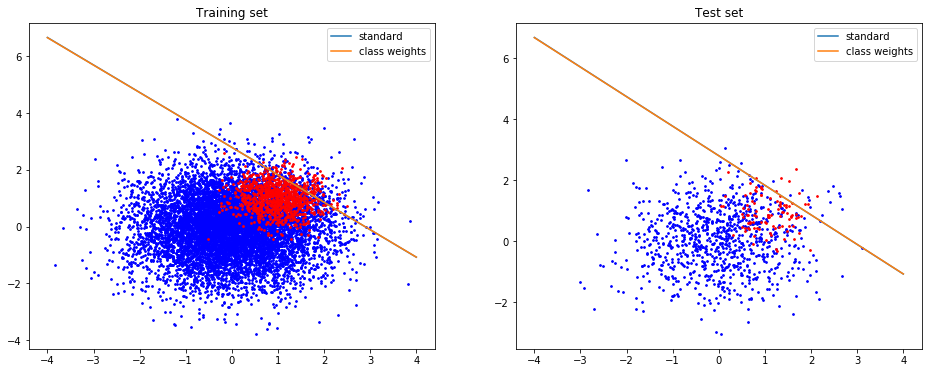

In [24]:
x2 = [-4, 4]
y2 = f(x2, model.get_weights())

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title("Training set")
plt.legend(['standard', 'class weights'])
plt.subplot(1, 2, 2)
plt.scatter(x_test[:900, 0], x_test[:900, 1], s=3, c='b')
plt.scatter(x_test[900:, 0], x_test[900:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title("Test set")
plt.legend(['standard', 'class weights'])

In [25]:
model = Sequential()
#model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

from utils import sample_binomial
from keras.losses import binary_crossentropy

def reinforce_loss(y_true, y_pred):
    y_samp = sample_binomial(y_pred)
    rewards = auc(y_true, y_samp)
    baseline = auc(y_true, y_pred)
    advantages = rewards - baseline
    return advantages * binary_crossentropy(y_samp, y_pred)

model.compile(loss=reinforce_loss, optimizer='adam', metrics=['accuracy', auc])

In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: -0.2369 - acc: 0.5363 - auc: 0.6858 - val_loss: nan - val_acc: 0.5050 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: -0.2250 - acc: 0.5393 - auc: 0.6915 - val_loss: nan - val_acc: 0.5050 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: -0.2337 - acc: 0.5413 - auc: 0.6967 - val_loss: nan - val_acc: 0.5110 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: -0.2318 - acc: 0.5424 - auc: 0.6919 - val_loss: nan - val_acc: 0.5120 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: -0.2375 - acc: 0.5427 - auc: 0.7009 - val_loss: nan - val_acc: 0.5060 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: -0.2320 - acc: 0.5432 - auc: 0.7042 - val_loss: nan - val_acc: 0.5110 - val_auc: nan
Epoch 7/100
10000/100

10000/10000 [==============================] - 0s - loss: -0.2335 - acc: 0.5687 - auc: 0.8065 - val_loss: nan - val_acc: 0.5420 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: -0.2419 - acc: 0.5675 - auc: 0.8086 - val_loss: nan - val_acc: 0.5380 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: -0.2397 - acc: 0.5649 - auc: 0.8136 - val_loss: nan - val_acc: 0.5380 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: -0.2473 - acc: 0.5667 - auc: 0.8146 - val_loss: nan - val_acc: 0.5390 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: -0.2436 - acc: 0.5687 - auc: 0.8145 - val_loss: nan - val_acc: 0.5400 - val_auc: nan
Epoch 58/100
10000/10000 [==============================] - 0s - loss: -0.2411 - acc: 0.5682 - auc: 0.8147 - val_loss: nan - val_acc: 0.5410 - val_auc: nan
Epoch 59/100
10000/10000 [==============================] - 0s - loss: -0.235

In [27]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.5, y_test)

array([[481,   5],
       [419,  95]])

In [28]:
roc_auc_score(y_test, y_pred)

0.79483333333333339

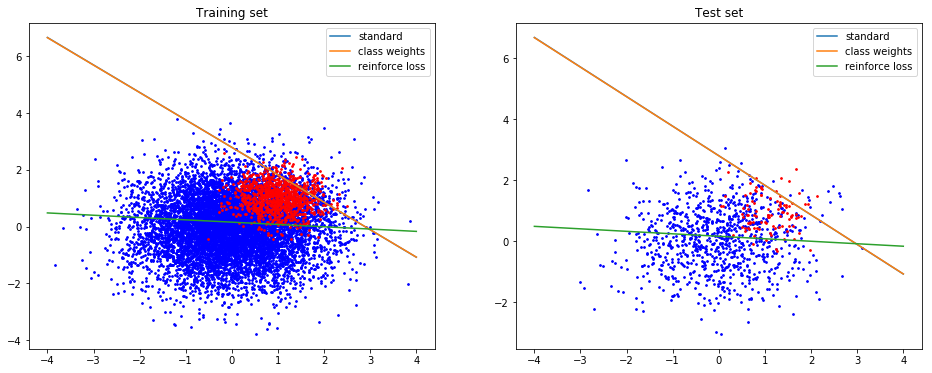

In [29]:
x3 = [-4, 4]
y3 = f(x3, model.get_weights())

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.title("Training set")
plt.legend(['standard', 'class weights', 'reinforce loss'])
plt.subplot(1, 2, 2)
plt.scatter(x_test[:900, 0], x_test[:900, 1], s=3, c='b')
plt.scatter(x_test[900:, 0], x_test[900:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.title("Test set")
plt.legend(['standard', 'class weights', 'reinforce loss'])

In [46]:
model = Sequential()
#model.add(Dense(100, input_shape=(num_features,), activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(1, input_shape=(num_features,), activation='sigmoid'))

def auc_loss(y_true, y_pred):
    y_true_1 = tf.equal(y_true[:, 0], 1)
    y_true_0 = tf.equal(y_true[:, 0], 0)
    prob_1 = tf.boolean_mask(y_pred, y_true_1)
    prob_0 = tf.boolean_mask(y_pred, y_true_0)
    agtb = tf.cast(prob_1[:, None] > prob_0[None, :], tf.float32)
    baseline = tf.reduce_mean(agtb)
    rewards_1 = tf.reduce_mean(agtb, axis=1)
    rewards_0 = tf.reduce_mean(agtb, axis=0)
    advantages_1 = rewards_1 - baseline
    advantages_0 = rewards_0 - baseline
    return tf.reduce_mean(advantages_1 * -tf.log(prob_1)) + tf.reduce_mean(advantages_0 * tf.log(prob_0))

def auc_loss(y_true, y_pred):
    y_true = K.print_tensor(y_true, 'y_true: ')
    y_pred = K.print_tensor(y_pred, 'y_pred: ')
    y_true_1 = tf.equal(y_true[:, 0], 1)
    y_true_0 = tf.equal(y_true[:, 0], 0)
    y_true_1 = K.print_tensor(y_true_1, 'y_true_1: ')
    y_true_0 = K.print_tensor(y_true_0, 'y_true_0: ')
    prob_1 = tf.boolean_mask(y_pred, y_true_1)
    prob_0 = tf.boolean_mask(y_pred, y_true_0)
    prob_1 = K.print_tensor(prob_1, 'prob_1: ')
    prob_0 = K.print_tensor(prob_0, 'prob_0: ')
    agtb = tf.cast(prob_1[:, None] > prob_0[None, :], tf.float32)
    agtb = K.print_tensor(agtb, 'agtb: ')
    rewards_1 = tf.reduce_mean(agtb, axis=1)
    rewards_0 = tf.reduce_mean(agtb, axis=0)
    rewards_1 = K.print_tensor(rewards_1, 'rewards_1: ')
    rewards_0 = K.print_tensor(rewards_0, 'rewards_0: ')
    advantages_1 = 1 - rewards_1
    advantages_0 = 1 - rewards_0
    advantages_1 = K.print_tensor(advantages_1, 'advantages_1: ')
    advantages_0 = K.print_tensor(advantages_0, 'advantages_0: ')
    return tf.reduce_mean(advantages_1 * -tf.log(prob_1)) + tf.reduce_mean(advantages_0 * tf.log(prob_0))

model.compile(loss=auc_loss, optimizer='adam', metrics=['accuracy', auc])
#model.fit(x_train[9000-5:9000+5], y_train[9000-5:9000+5], batch_size=10, epochs=1, shuffle=False)

In [47]:
model.fit(x_train, y_train, batch_size=100, epochs=100, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 0s - loss: 0.0209 - acc: 0.5442 - auc: 0.8460 - val_loss: nan - val_acc: 0.5310 - val_auc: nan
Epoch 2/100
10000/10000 [==============================] - 0s - loss: 0.0170 - acc: 0.5193 - auc: 0.8592 - val_loss: nan - val_acc: 0.4980 - val_auc: nan
Epoch 3/100
10000/10000 [==============================] - 0s - loss: 0.0147 - acc: 0.4945 - auc: 0.8660 - val_loss: nan - val_acc: 0.4690 - val_auc: nan
Epoch 4/100
10000/10000 [==============================] - 0s - loss: 0.0122 - acc: 0.4675 - auc: 0.8734 - val_loss: nan - val_acc: 0.4520 - val_auc: nan
Epoch 5/100
10000/10000 [==============================] - 0s - loss: 0.0108 - acc: 0.4442 - auc: 0.8787 - val_loss: nan - val_acc: 0.4390 - val_auc: nan
Epoch 6/100
10000/10000 [==============================] - 0s - loss: 0.0096 - acc: 0.4223 - auc: 0.8857 - val_loss: nan - val_acc: 0.4090 - val_auc: nan
Epoch 7/100
10000/10000 [==

10000/10000 [==============================] - 0s - loss: 8.9072e-04 - acc: 0.1333 - auc: 0.8961 - val_loss: nan - val_acc: 0.1340 - val_auc: nan
Epoch 54/100
10000/10000 [==============================] - 0s - loss: 8.3346e-04 - acc: 0.1325 - auc: 0.8966 - val_loss: nan - val_acc: 0.1340 - val_auc: nan
Epoch 55/100
10000/10000 [==============================] - 0s - loss: 7.7946e-04 - acc: 0.1324 - auc: 0.8981 - val_loss: nan - val_acc: 0.1340 - val_auc: nan
Epoch 56/100
10000/10000 [==============================] - 0s - loss: 7.9699e-04 - acc: 0.1320 - auc: 0.8984 - val_loss: nan - val_acc: 0.1340 - val_auc: nan
Epoch 57/100
10000/10000 [==============================] - 0s - loss: 7.8087e-04 - acc: 0.1318 - auc: 0.8956 - val_loss: nan - val_acc: 0.1340 - val_auc: nan
Epoch 58/100
10000/10000 [==============================] - 0s - loss: 7.1222e-04 - acc: 0.1310 - auc: 0.8987 - val_loss: nan - val_acc: 0.1330 - val_auc: nan
Epoch 59/100
10000/10000 [==============================] -

In [48]:
y_pred = model.predict(x_test)
confusion_matrix(y_pred > 0.9, y_test)

array([[155,   0],
       [745, 100]])

In [49]:
roc_auc_score(y_test, y_pred)

0.89760555555555555

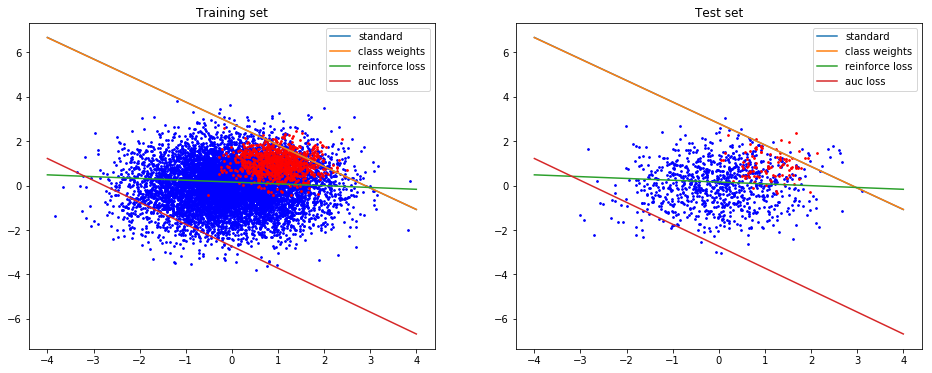

In [50]:
x4 = [-4, 4]
y4 = f(x4, model.get_weights())

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:9000, 0], x_train[:9000, 1], s=3, c='b')
plt.scatter(x_train[9000:, 0], x_train[9000:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.title("Training set")
plt.legend(['standard', 'class weights', 'reinforce loss', 'auc loss'])
plt.subplot(1, 2, 2)
plt.scatter(x_test[:900, 0], x_test[:900, 1], s=3, c='b')
plt.scatter(x_test[900:, 0], x_test[900:, 1], s=3, c='r')
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.title("Test set")
plt.legend(['standard', 'class weights', 'reinforce loss', 'auc loss'])